In [1]:
from nvidia.dali.pipeline import Pipeline
import nvidia.dali.ops as ops
import nvidia.dali.types as types
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import os.path
import fnmatch

In [6]:
image_dir = "data"
batch_size = 26

In [7]:
def showImages(image_batch):
    columns = 4
    rows = (batch_size+1) // columns
    fig = plt.figure(figsize = (32, (32 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for j in range(rows * columns):
        plt.subplot(gs[j])
        plt.axis("off")
        plt.imshow(image_batch.at(j))

def printDirHierarchy(path_to_images):
    for root, dir, files in os.walk(path_to_images):
        depth = root.count('/')
        ret = ""
        if depth > 0:
            ret += "  " * (depth - 1) + "|-"
        print(ret + root)
        for items in fnmatch.filter(files, "*"):
            print(" " * len(ret) + "|-" + items)

In [8]:
class SimplePipeline(Pipeline):
    def __init__ (self, batch_size, num_threads, device_id):
        super(SimplePipeline, self).__init__(batch_size, num_threads, device_id, seed=12)
        self.input = ops.FileReader(file_root = image_dir)
        # or we can write a list for specified file list
        # self.input = ops.FileReader(file_root = image_dir, file_list=image_dir+"/file_list.txt")
        self.decode = ops.ImageDecoder(device='cpu', output_type=types.RGB)

    def define_graph(self):
        jpegs, labels = self.input() # read in jpeg files
        images = self.decode(jpegs) # Do decoding process
        return (images, labels)

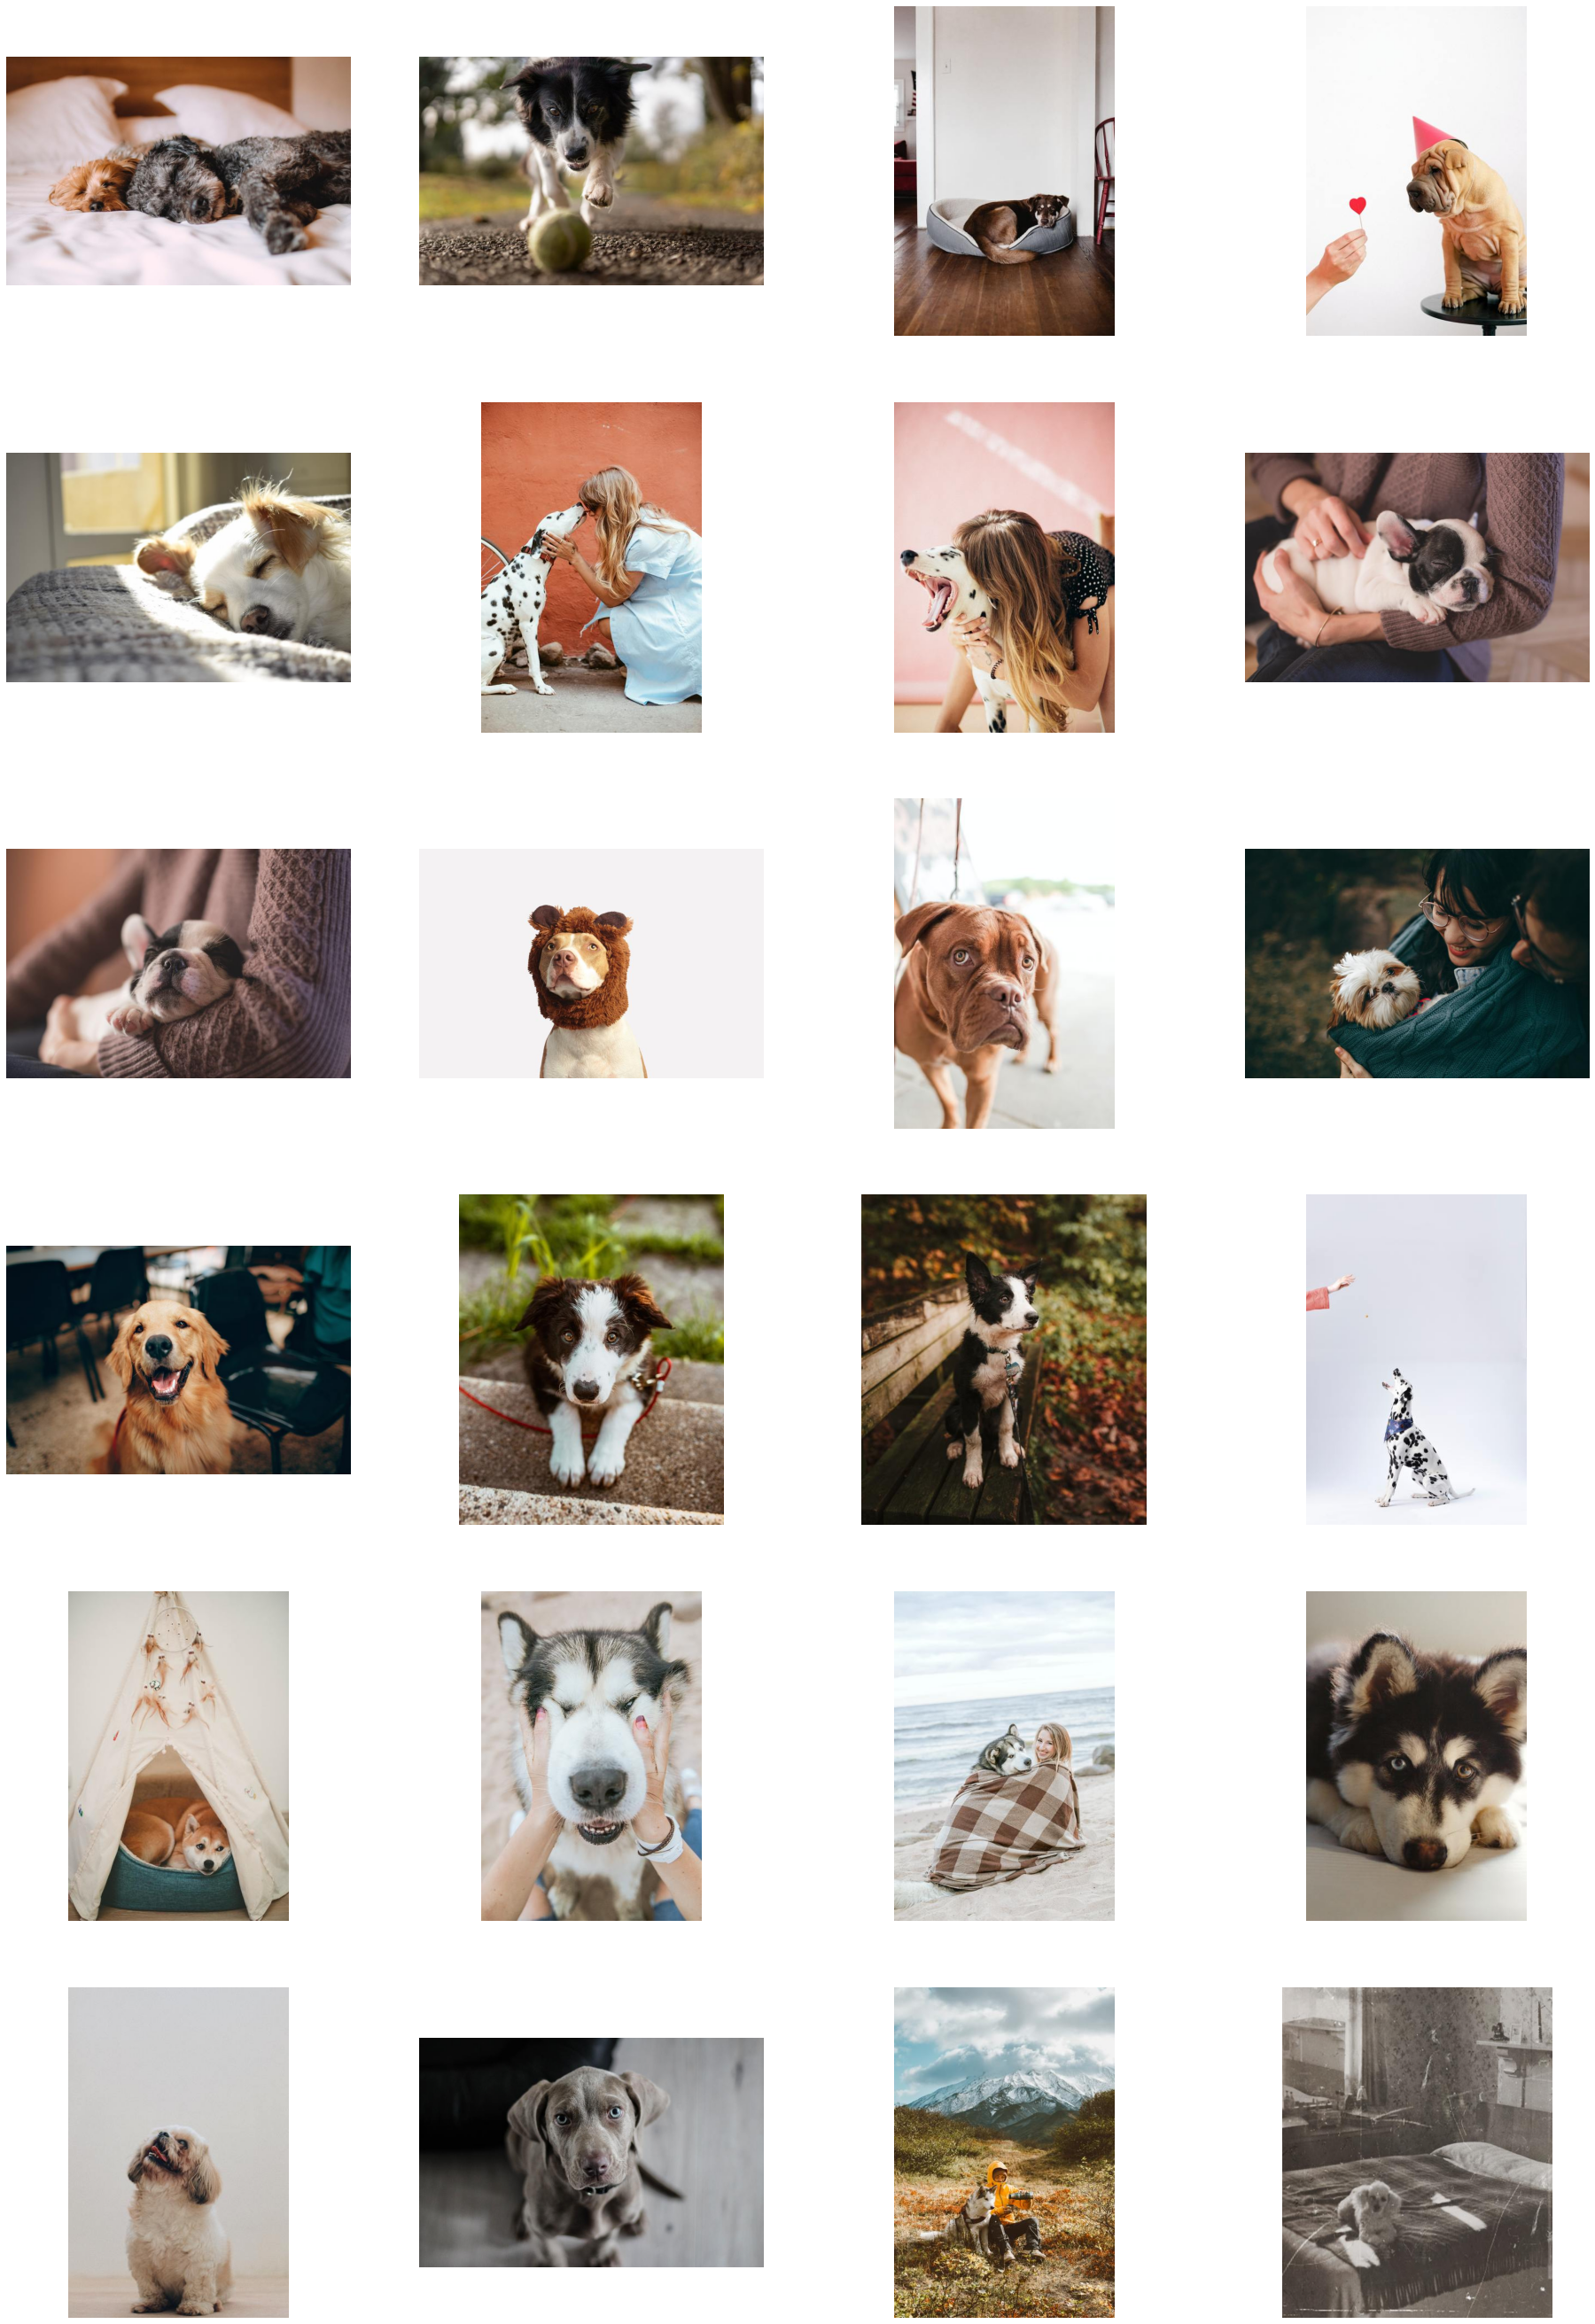

In [9]:
if __name__ == "__main__":
    pipe = SimplePipeline(batch_size, 1, 0)
    pipe.build()
    pipe_out = pipe.run()
    images, labels = pipe_out
    showImages(images)
#     printDirHierarchy(image_dir)